**AUTHOR:**  

Nabiel Husein Shihab / nabielshihab@hotmail.com

**NOTEBOOK DESCRIPTION**

This script is used to select earthquakes by creating polygon in order to estimate magnitude of completeness and maximum magnitude for calculating b-value, its uncertainty and 95% confidence interval. 

# Import Functions.

In [1]:
from library.curve_fitting_method import *
from library.visualization import *
from library.mag_of_completeness import *
from matplotlib import path

# Read an Earthquake Catalog File from Catalogs Folder

In [2]:
file_name = 'catalogs/earthquakes.csv'
catalog = pd.read_csv(file_name)

print(f"number of catalog rows    : {catalog.shape[0]}")
print(f"number of catalog columns : {catalog.shape[1]}")
catalog.head()

number of catalog rows    : 1193
number of catalog columns : 4


,X,Y,Z,M
0,128.263141,-3.592250,-9.398,3.263406
1,128.379281,-3.619712,-9.167,4.357416
2,128.356440,-3.467614,-12.305,2.573589
3,128.351284,-3.615661,-11.570,2.970120
4,128.357585,-3.619155,-10.153,2.966920


# Select Earthquakes by Creating a Polygon Manually

D:\OneDrive\Projects\Github\python-modular\library\visualization.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


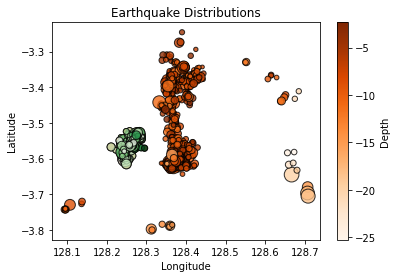

In [3]:
# plotting EQ epicenters
%matplotlib qt
plot_eq_distribution(catalog, coor='lon/lat')

# defining the polygon
poly = plt.ginput(8)
poly = np.array(poly)

# searching events that are included in the polygon
p = path.Path(poly)
p_index = list(np.where(p.contains_points(np.transpose(np.array([catalog['X'], catalog['Y']]))) == 1)[0])

# extracting event coordinates and magnitudes that are included in polygon
mag         = catalog['M'][p_index]
x_poly      = catalog['X'][p_index]
y_poly      = catalog['Y'][p_index]
z_poly      = catalog['Z'][p_index]

# plotting events that are included in polygon
%matplotlib inline
fig, ax = plot_eq_distribution(catalog, coor='lon/lat')
ax.scatter(x_poly, y_poly, c=z_poly, cmap='Greens', edgecolors='k', s=mag**3.5, alpha=0.8)

# Calculate Mc and maxmag for b-value Calculation and Plot the Frequency-Magnitude Distribution (FMD)

Mc estimation method options:
>1. `maximum curvature (maxc)`
2. `goodness-of-fit test (gft)`
3. `Mc by b-value stability (mbs)`

Maximum magnitude estimation method :
>`maxmag = 𝑋𝑚𝑎𝑥1 + (𝑋𝑚𝑎𝑥1 – 𝑋𝑚𝑎𝑥2)`

>where :
maxmag = maximum magnitude,
Xmax1 = the biggest magnitude,
Xmax2 = the second biggest magnitude 

Sources: 
1. Mignan, A. dan Woessner, J. (2012): Estimating The Magnitude of completeness in Earthquake Catalogs. Community Online Resource for Statistical Seismicity Analysis. 
2. Kijko, A. dan Funk, C. W. (1994): The Assesment of Seismic Hazard in Mines. The Journal of the South African Institute of Mining and Metallurgy.

Magnitude of Completeness : 2.9
Maximum magnitude : 5.4


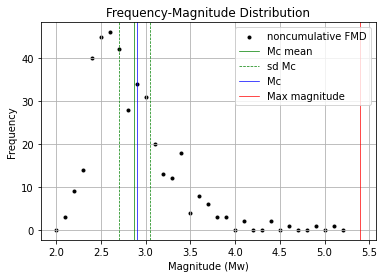

In [4]:
# magnitude of completeness estimation method
mc_method       = 'mbs'

# calculating Mc & maxmag
fmd_data        = fmd_details(mag, mc_method)
mc              = fmd_data['mc']
maxmag          = fmd_data['maxmag']

print(f"Magnitude of Completeness : {mc}")
print(f"Maximum magnitude : {maxmag}")

# plotting FMD, Mc, maxmag
plot_noncum_fmd(fmd_data)

# Calculate b-value, Its Uncertainty, and Its 95% Confidence Interval

Curve fitting method options:
>1. `LM with Gaussian residual (b-value glog)`
2. `GLM with Gaussian residual (b-value glin)`
3. `GLM with Poisson residual (b-value pois)`

Source :
1. Naylor, M., Greenhough, J., McCloskey, J., Bell, A. F., dan Main, I. G. (2009): Statistical evaluation of characteristic earthquakes in the frequency magnitudo distributions of Sumatra and other subduction zone regions, Geophysical Research Letters, 36.

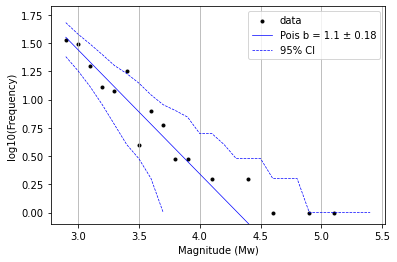

In [5]:
# curve fitting method
cv_method    = 'b-value pois'

# b-value and its uncertainty calculation
cv_data     = generate_autobvalue(cv_method, fmd_data)
bvalue      = cv_data['bvalue']
sd_bvalue   = cv_data['unc']

# plotting b-value and its 95% of confidence interval
plot_bvalue(cv_data, cv_method)